## Insurance Case Study

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt 
from matplotlib import pyplot as plt

In [2]:
## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create
##a 360-degree view of the data. Use the same for the subsequent questions.

In [3]:
Inp1=pd.read_csv(r'C:\Users\goura\Downloads\Compressed\Gaurav_data_science\Basic Python Stats Modelling\Assignments\Case Studies\case study insurance\5. Pandas Case Study 3 - Insurance Claims Case Study\claims.csv')
Inp2=pd.read_csv(r'C:\Users\goura\Downloads\Compressed\Gaurav_data_science\Basic Python Stats Modelling\Assignments\Case Studies\case study insurance\5. Pandas Case Study 3 - Insurance Claims Case Study\cust_demographics.csv')

In [4]:
Inp1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [5]:
Inp2.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
Inp_Insurance=pd.merge(Inp1,Inp2,left_on=Inp1.customer_id,right_on=Inp2.CUST_ID)

In [7]:
Inp_Insurance

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,30308357,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,47830476,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [8]:
Inp_Insurance.drop(columns='key_0',inplace=True)

In [9]:
Inp_Insurance.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [10]:
##2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns
##and their business significance.

In [11]:
Inp_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
CUST_ID                1085 non-null int64
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: float64(1), int64(3), object(12)
memory usage: 144.1+ KB


In [12]:
## There are 3 Variables that has wrong data types(Claim Date,Claim Amount,Date of Birth)

In [13]:
##3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

Inp_Insurance.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [14]:
Inp_Insurance.claim_amount=Inp_Insurance.claim_amount.astype(str)

In [15]:
Inp_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1085 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
CUST_ID                1085 non-null int64
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: float64(1), int64(3), object(12)
memory usage: 144.1+ KB


In [16]:
Inp_Insurance.claim_amount=Inp_Insurance.claim_amount.apply(lambda x : x.lstrip('$'))

In [17]:
Inp_Insurance.claim_amount=Inp_Insurance.claim_amount.astype('float64')

In [18]:
Inp_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null float64
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
CUST_ID                1085 non-null int64
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 144.1+ KB


In [19]:
##4. Of all the injury claims, some of them have gone unreported with the police. 
##Create an alert flag (1,0) for all such claims.

Inp_Insurance.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


In [20]:
Inp_Insurance.claim_type.value_counts()

Material only          653
Material and injury    237
Injury only            195
Name: claim_type, dtype: int64

In [21]:
A1=np.where(Inp_Insurance.claim_type == 'Injury only')

In [22]:
A1

(array([   8,   18,   21,   22,   23,   27,   33,   41,   47,   48,   50,
          54,   71,   80,   82,   88,   97,  102,  103,  104,  106,  113,
         115,  116,  117,  119,  127,  129,  133,  139,  144,  147,  154,
         157,  159,  163,  169,  174,  175,  178,  180,  184,  188,  189,
         191,  197,  201,  218,  227,  230,  232,  242,  248,  249,  261,
         267,  269,  282,  287,  293,  310,  317,  318,  320,  334,  344,
         346,  358,  361,  364,  381,  382,  390,  401,  402,  404,  410,
         411,  419,  420,  421,  423,  425,  432,  443,  445,  454,  455,
         464,  471,  484,  493,  502,  504,  507,  509,  510,  513,  536,
         537,  538,  542,  544,  553,  560,  561,  562,  566,  570,  581,
         593,  605,  608,  612,  626,  629,  631,  638,  644,  645,  658,
         662,  667,  668,  672,  679,  690,  692,  698,  712,  721,  722,
         727,  731,  735,  741,  744,  746,  753,  756,  758,  760,  761,
         762,  773,  779,  787,  788, 

In [23]:
df_clm_typ=Inp_Insurance.iloc[A1]

In [24]:
df_clm_typ.info()##195 observations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 8 to 1082
Data columns (total 16 columns):
claim_id               195 non-null int64
customer_id            195 non-null int64
incident_cause         195 non-null object
claim_date             195 non-null object
claim_area             195 non-null object
police_report          195 non-null object
claim_type             195 non-null object
claim_amount           184 non-null float64
total_policy_claims    192 non-null float64
fraudulent             195 non-null object
CUST_ID                195 non-null int64
gender                 195 non-null object
DateOfBirth            195 non-null object
State                  195 non-null object
Contact                195 non-null object
Segment                195 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 25.9+ KB


In [25]:
df_clm_typ['Flag']=df_clm_typ.police_report.apply(lambda x : 1 if (x == 'Yes') else 0)

C:\Users\goura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_clm_typ[['police_report','Flag']].head()

,police_report,Flag
8,No,0
18,Yes,1
21,No,0
22,No,0
23,Yes,1


In [27]:
##5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved.  
##However, customer ID should remain unique.

##Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.


In [28]:
df_index=Inp_Insurance.CUST_ID.value_counts().reset_index()

In [30]:
df_index.rename(columns=({'index':'CUST_ID','CUST_ID':'VALUE_COUNTS'}),inplace=True)

In [31]:
df_index

,CUST_ID,VALUE_COUNTS
0,85357756,2
1,53539195,2
2,30308357,2
3,84147585,2
4,21831191,2
...,...,...
1073,57896241,1
1074,48538925,1
1075,10198314,1
1076,91546921,1


In [32]:
df_Insurance=pd.merge(df_index,Inp_Insurance,on='CUST_ID')

In [33]:
df_Insurance.head(2)

,CUST_ID,VALUE_COUNTS,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,85357756,2,23938559,85357756,Driver error,02/23/2017,Auto,No,Material only,2130.0,1.0,No,Male,02-Jan-70,PA,915-698-3649,Platinum
1,85357756,2,1654201,85357756,Driver error,06/23/2018,Auto,Unknown,Material only,2510.0,1.0,No,Male,02-Jan-70,PA,915-698-3649,Platinum


In [34]:
df_dup_rec=df_Insurance.where(df_Insurance.VALUE_COUNTS>1)

In [35]:
df_dup_rec.dropna(inplace=True)

In [37]:
df_dup_rec

,CUST_ID,VALUE_COUNTS,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,85357756.0,2.0,23938559.0,85357756.0,Driver error,02/23/2017,Auto,No,Material only,2130.0,1.0,No,Male,02-Jan-70,PA,915-698-3649,Platinum
1,85357756.0,2.0,1654201.0,85357756.0,Driver error,06/23/2018,Auto,Unknown,Material only,2510.0,1.0,No,Male,02-Jan-70,PA,915-698-3649,Platinum
2,53539195.0,2.0,2432399.0,53539195.0,Other causes,12/24/2017,Home,No,Material only,2480.0,1.0,No,Male,02-Oct-89,NV,914-342-8239,Gold
3,53539195.0,2.0,41779510.0,53539195.0,Driver error,10/03/2018,Home,No,Injury only,25040.0,1.0,No,Male,02-Oct-89,NV,914-342-8239,Gold
4,30308357.0,2.0,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
5,30308357.0,2.0,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
6,84147585.0,2.0,30280492.0,84147585.0,Driver error,01/07/2017,Auto,Unknown,Material only,2380.0,1.0,No,Male,18-Oct-72,AK,743-569-4783,Gold
7,84147585.0,2.0,78221963.0,84147585.0,Driver error,04/10/2018,Auto,Yes,Injury only,14430.0,4.0,No,Male,18-Oct-72,AK,743-569-4783,Gold
8,21831191.0,2.0,24050443.0,21831191.0,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes,Male,17-May-77,NH,419-712-8513,Gold
9,21831191.0,2.0,91475471.0,21831191.0,Driver error,02/09/2018,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,17-May-77,NH,419-712-8513,Gold


In [40]:
df_dup_rec.claim_date=pd.to_datetime(df_dup_rec.claim_date,format='%m/%d/%Y')

In [49]:
df_dup_rec_1=df_dup_rec.groupby('CUST_ID').claim_date.apply(lambda x : x.sort_values()).reset_index()

In [50]:
df_dup_rec_1

,CUST_ID,level_1,claim_date
0,19269962.0,10,2018-01-13
1,19269962.0,11,2018-09-26
2,21831191.0,8,2017-10-04
3,21831191.0,9,2018-02-09
4,30308357.0,4,2018-02-02
5,30308357.0,5,2018-04-04
6,47830476.0,13,2017-04-12
7,47830476.0,12,2018-06-17
8,53539195.0,2,2017-12-24
9,53539195.0,3,2018-10-03


In [53]:
df_dup_rec_1.drop_duplicates('CUST_ID',keep='last',inplace=True)

In [57]:
df_dup_rec_final=pd.merge(df_dup_rec,df_dup_rec_1,on=['CUST_ID','claim_date'])

In [58]:
df_dup_rec_final

,CUST_ID,VALUE_COUNTS,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,level_1
0,85357756.0,2.0,1654201.0,85357756.0,Driver error,2018-06-23,Auto,Unknown,Material only,2510.0,1.0,No,Male,02-Jan-70,PA,915-698-3649,Platinum,1
1,53539195.0,2.0,41779510.0,53539195.0,Driver error,2018-10-03,Home,No,Injury only,25040.0,1.0,No,Male,02-Oct-89,NV,914-342-8239,Gold,3
2,30308357.0,2.0,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,5
3,84147585.0,2.0,78221963.0,84147585.0,Driver error,2018-04-10,Auto,Yes,Injury only,14430.0,4.0,No,Male,18-Oct-72,AK,743-569-4783,Gold,7
4,21831191.0,2.0,91475471.0,21831191.0,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,17-May-77,NH,419-712-8513,Gold,9
5,19269962.0,2.0,39219616.0,19269962.0,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,13-May-77,NV,956-871-8691,Gold,11
6,47830476.0,2.0,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,12


In [59]:
##6. Check for missing values and impute the missing values with an appropriate value.
##(mean for continuous and mode for categorical)


In [60]:
Inp_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null float64
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
CUST_ID                1085 non-null int64
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 144.1+ KB


In [61]:
Inp_Insurance.total_policy_claims.value_counts()

1.0    785
2.0    105
3.0     86
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [62]:
Inp_Insurance[['claim_amount','total_policy_claims']]

,claim_amount,total_policy_claims
0,2980.0,1.0
1,2980.0,3.0
2,3369.5,1.0
3,1950.0,6.0
4,1680.0,1.0
...,...,...
1080,1770.0,1.0
1081,2800.0,1.0
1082,33080.0,2.0
1083,2840.0,4.0


In [63]:
## claim_amount is a continous variable so imputing the mean value in this

In [121]:
np.count_nonzero(Inp_Insurance.claim_amount.unique())

677

In [64]:
Inp_Insurance.claim_amount.count()

1020

In [65]:
Inp_Insurance.claim_amount=Inp_Insurance.claim_amount.fillna(Inp_Insurance.claim_amount.mean())

In [66]:
Inp_Insurance.claim_amount.count()

1085

In [67]:
## total_policy_claims is a categorical variable so imputing the values with mode

In [123]:
np.count_nonzero(Inp_Insurance.total_policy_claims.unique())

9

In [68]:
Inp_Insurance.total_policy_claims.count()

1075

In [69]:
Inp_Insurance.total_policy_claims=Inp_Insurance.total_policy_claims.fillna(Inp_Insurance.total_policy_claims.mode())

In [197]:
Inp_Insurance.total_policy_claims.count()

1075

In [72]:
Inp_Insurance.total_policy_claims.mode()

0    1.0
dtype: float64

In [94]:
## ??????????????????????????????????????????????Not able to install package????????????????????????????????????????????????????

##import pip

##from sklearn_pandas import CategoricalImputer

##imputer = CategoricalImputer()
##imputer.fit_transform(Inp_Insurance.total_policy_claims)
##*********************************************************************************************************
##package_names=['sklearn-pandas', 'requests'] #packages to install
##pip.main(['install'] + package_names + ['--upgrade']) 

##from sklearn_pandas import CategoricalImputer
##from sklearn_pandas import CategoricalImputer

In [95]:
##def Catog_Vars_Summary(x):
   ## Mode= x.value_counts().sort_values(ascending=False)[0:1].reset_index()
    ##return pd.Series([x.count(),x.isnull().sum(),Mode.iloc[0,0],Mode.iloc[0,1],
                     ##round(Mode.iloc[0,1]*100/x.count(),2)],index=['N','NMISS','MODE','FREQ','PERCENT'])

In [97]:
##def missing_value_imputation(x,stats='mean'):
    ##if (x.dtypes == 'int64') | (x.dtypes == 'float64'):
        ##x = x.fillna(x.mean() if stats == 'mean' else x.fillna(x.median())) 
    ##else:
        ##x = x.fillna(x.mode())
    ##return x

In [98]:
##7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
##Children < 18
##Youth 18-30
##Adult 30-60
##Senior > 60


In [128]:
Inp_Insurance.DateOfBirth=pd.to_datetime(Inp_Insurance.DateOfBirth,format='%d-%b-%y')
Inp_Insurance.claim_date=pd.to_datetime(Inp_Insurance.claim_date)

In [129]:
Inp_Insurance.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,DOB_Year,YEAR,Age_Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,1979,41,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1970,50,Adult


In [141]:
Inp_Insurance.claim_date.dt.year.unique()

array([2017, 2018], dtype=int64)

In [142]:
Inp_Insurance.DateOfBirth.dt.year.unique()

array([1979, 1970, 1984, 1986, 1977, 1999, 1993, 2066, 1985, 1990, 2063,
       1969, 1987, 2065, 2067, 1974, 1980, 1981, 1995, 1996, 2062, 1994,
       2068, 1971, 1988, 1989, 1976, 1975, 2064, 1998, 2060, 2061, 1972,
       1992, 1997, 1973, 1982, 1978, 1991, 1983], dtype=int64)

In [147]:
Inp_Insurance.DateOfBirth=np.where(Inp_Insurance.DateOfBirth.dt.year>2020,Inp_Insurance.DateOfBirth+pd.DateOffset(years=-100),Inp_Insurance.DateOfBirth)

In [148]:
Inp_Insurance.DateOfBirth.dt.year.unique()

array([1979, 1970, 1984, 1986, 1977, 1999, 1993, 1966, 1985, 1990, 1963,
       1969, 1987, 1965, 1967, 1974, 1980, 1981, 1995, 1996, 1962, 1994,
       1968, 1971, 1988, 1989, 1976, 1975, 1964, 1998, 1960, 1961, 1972,
       1992, 1997, 1973, 1982, 1978, 1991, 1983], dtype=int64)

In [149]:
Df_Age=Inp_Insurance

In [150]:
Df_Age.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,DOB_Year,YEAR,Age_Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,1979,41,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1970,50,Adult


In [156]:
Year=Df_Age.claim_date-Df_Age.DateOfBirth

In [157]:
Df_Age['Age']=round((Year.dt.days)/365.25,0)

In [159]:
Df_Age.Age.unique()

array([39., 49., 34., 32., 31., 41., 40., 19., 18., 24., 51., 28., 55.,
       52., 38., 50., 43., 37., 36., 22., 33., 46., 29., 44., 23., 42.,
       21., 25., 47., 54., 27., 57., 56., 48., 30., 45., 20., 58., 35.,
       26., 53., 17.])

In [168]:
Df_Age.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,DOB_Year,Age_Flag,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,1979,Adult,39.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1970,Adult,49.0


In [161]:
## Creating Age Function

def Age_Div (x):
    if x<18:
        return ('Children')
    elif 18<=x<=30:
        return ('Youth')
    elif 31<=x<=60:
        return ('Adult')
    else:
        return ('Senior')    

In [162]:
Df_Age['Age_Flag'] = Df_Age.Age.apply(Age_Div)

In [164]:
Df_Age[['Age','Age_Flag']]

,Age,Age_Flag
0,39.0,Adult
1,49.0,Adult
2,34.0,Adult
3,34.0,Adult
4,32.0,Adult
...,...,...
1080,37.0,Adult
1081,21.0,Youth
1082,27.0,Youth
1083,52.0,Adult


In [165]:
Df_Age.Age_Flag.unique()

array(['Adult', 'Youth', 'Children'], dtype=object)

In [169]:
##8. What is the average amount claimed by the customers from various segments?

Inp_Insurance.groupby('Segment').claim_amount.mean()

Segment
Gold        12829.631974
Platinum    12341.952267
Silver      12208.435570
Name: claim_amount, dtype: float64

In [170]:
##9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to
##1st of October, 2018.
Inp_Insurance.claim_date=pd.to_datetime(Inp_Insurance.claim_date,format='%m/%d/%Y')

In [171]:
##At least 20 days prior to 1st of October, 2018 is 10-Sep-2018.

Prior_date=pd.to_datetime('10-09-2018',format='%d-%m-%Y')

In [172]:
AA1=np.where(Inp_Insurance.claim_date < Prior_date)

In [173]:
AA1

(array([   0,    2,    3,    4,    5,    6,    8,    9,   10,   11,   12,
          13,   14,   15,   16,   18,   20,   21,   22,   23,   24,   25,
          26,   27,   28,   29,   30,   31,   32,   33,   34,   35,   36,
          37,   38,   39,   40,   41,   42,   43,   45,   46,   47,   48,
          49,   50,   51,   52,   53,   54,   55,   56,   57,   58,   59,
          60,   61,   62,   63,   64,   65,   66,   67,   68,   69,   71,
          72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
          83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
          94,   95,   96,   97,   98,   99,  100,  101,  102,  103,  104,
         105,  106,  107,  108,  110,  111,  112,  114,  115,  116,  117,
         119,  120,  121,  122,  123,  124,  125,  126,  127,  128,  129,
         130,  131,  132,  135,  136,  137,  138,  139,  140,  142,  143,
         144,  146,  147,  149,  150,  151,  152,  153,  154,  155,  156,
         157,  158,  159,  160,  161, 

In [174]:
df_prior_claim=Inp_Insurance.iloc[AA1]

In [175]:
df_prior_claim.claim_amount.sum()

12402276.019607846

In [176]:
##10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

##df_Age.State.value_counts().sort_index()
##np.where(Df_Age.incident_cause =='Driver error')
Df_Age.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,DOB_Year,Age_Flag,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,1979,Adult,39.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1970,Adult,49.0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,1984,Adult,34.0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,1984,Adult,34.0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1986,Adult,32.0


In [177]:
##df_driver_issue=Df_Age.iloc[np.where(Df_Age.incident_cause =='Driver error')]

df_driver_issue=Df_Age.iloc[(np.where((Df_Age.incident_cause =='Driver error') & (Df_Age.State == 'TX') | (Df_Age.State == 'DE') | (Df_Age.State == 'AK')))]

In [178]:
df_driver_issue.shape

(55, 19)

In [179]:
##11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount 
##as a percentage on the pie chart.

In [180]:
Inp_Insurance.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,DOB_Year,Age_Flag,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,1979,Adult,39.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1970,Adult,49.0


In [181]:
PC1=Inp_Insurance.groupby(['Segment','gender']).claim_amount.sum().reset_index()

In [182]:
PC1['claim_amont_percent']=(PC1.claim_amount/PC1.claim_amount.sum())*100

In [183]:
PC1

,Segment,gender,claim_amount,claim_amont_percent
0,Gold,Female,2.109738e+06,15.595996
1,Gold,Male,2.701374e+06,19.969595
2,Platinum,Female,2.369484e+06,17.516136
3,Platinum,Male,2.098303e+06,15.511463
4,Silver,Female,1.901912e+06,14.059664
5,Silver,Male,2.346624e+06,17.347146


In [184]:
labels=['Gold-Female','Gold-Male','Platinum-Female','Platinum-Male','Silver-Female','Silver-Male']

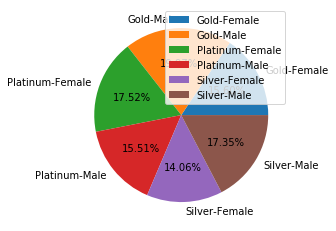

In [185]:
plt.pie(PC1.claim_amont_percent,autopct='%1.2f%%',labels=labels)

plt.legend()
plt.show()

In [186]:
##12. Among males and females, which gender had claimed the most for any type of driver related issues?
##E.g. This metric can be compared using a bar chart

df_gender_claim=Inp_Insurance.iloc[np.where((Inp_Insurance.incident_cause=='Driver error')|(Inp_Insurance.incident_cause=='Other driver error'))]

In [187]:
df_gender_claim.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,DOB_Year,Age_Flag,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,1979,Adult,39.0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,1984,Adult,34.0


In [188]:
GC1=df_gender_claim.groupby('gender').claim_amount.sum().reset_index()

In [189]:
GC1

,gender,claim_amount
0,Female,3.139645e+06
1,Male,4.017650e+06


<BarContainer object of 2 artists>

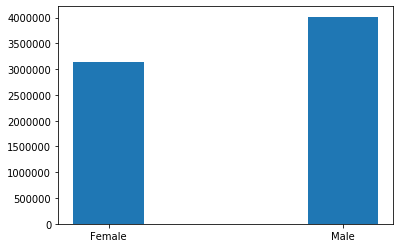

In [190]:
plt.bar(GC1.gender,height=GC1.claim_amount,width=0.3)

In [191]:
##13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

Df_Age.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,DOB_Year,Age_Flag,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,1979,Adult,39.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1970,Adult,49.0


In [197]:
df_fraud=Df_Age.iloc[np.where(Df_Age.fraudulent=='Yes')].groupby('Age_Flag').fraudulent.count().reset_index()

In [198]:
df_fraud

,Age_Flag,fraudulent
0,Adult,172
1,Youth,75


In [199]:
df_fraud.agg(['max','min'])

,Age_Flag,fraudulent
max,Youth,172
min,Adult,75


<BarContainer object of 2 artists>

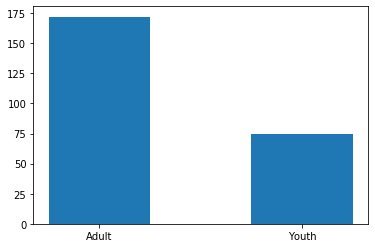

In [201]:
plt.bar(df_fraud.Age_Flag,height=df_fraud.fraudulent,width=0.5,align='center')

In [202]:
##14. Visualize the monthly trend of the total amount that has been claimed by the customers. 
##Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

Df_Age['MONTH']=pd.DatetimeIndex(Df_Age.claim_date).month_name()
df_monthly_claim=Df_Age

In [203]:
MC1=df_monthly_claim.groupby('MONTH').claim_amount.sum().reset_index()

In [226]:
MC1.head(2)

,MONTH,claim_amount
0,April,1.293886e+06
1,August,9.111950e+05


In [237]:
MC = MC1.reindex(Label1, axis=0)

In [244]:
MC_Final=pd.merge(MC.reset_index().rename(columns={'index':'Months'}).drop(columns=['MONTH','claim_amount']).rename(columns={'Months':'MONTH'}),MC1,on='MONTH')

In [245]:
MC_Final

,MONTH,claim_amount
0,January,1.331992e+06
1,February,1.169906e+06
2,March,1.320080e+06
3,April,1.293886e+06
4,May,1.114189e+06
5,June,1.278826e+06
6,July,1.379010e+06
7,August,9.111950e+05
8,September,9.828598e+05
9,October,1.447673e+06


In [246]:
import seaborn as sns

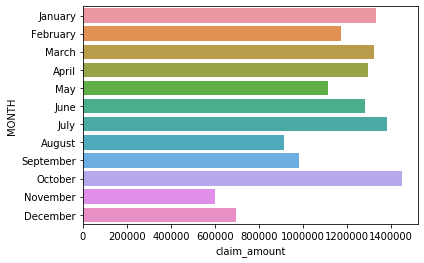

In [250]:
sns.barplot(MC_Final.claim_amount,MC_Final.MONTH,orient='h')

In [254]:
##15. What is the average claim amount for gender and age categories and suitably represent the above using a 
##facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

FC=Df_Age.iloc[np.where(Df_Age.fraudulent=='Yes')]
NFC=Df_Age.iloc[np.where(Df_Age.fraudulent=='No')]

import seaborn as sns

In [251]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=7c9f9d4f2aa668e997f4daf4f0faf72121b4344ac6e44bbc74c3c258144c1fb5
  Stored in directory: C:\Users\goura\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [255]:
FC1=FC.groupby(['Age_Flag','gender']).claim_amount.mean().reset_index()
NFC1=NFC.groupby(['Age_Flag','gender']).claim_amount.mean().reset_index()

In [256]:
FC1

,Age_Flag,gender,claim_amount
0,Adult,Female,12461.830414
1,Adult,Male,17062.062958
2,Youth,Female,7730.402888
3,Youth,Male,10683.330108


In [257]:
NFC1

,Age_Flag,gender,claim_amount
0,Adult,Female,12471.118568
1,Adult,Male,12216.060222
2,Children,Female,20200.000000
3,Children,Male,24610.000000
4,Youth,Female,12121.238286
5,Youth,Male,12199.903042


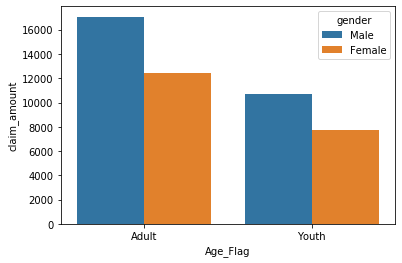

In [258]:
sns.barplot(FC1.Age_Flag,FC1.claim_amount,hue=FC1.gender,hue_order=['Male','Female'])

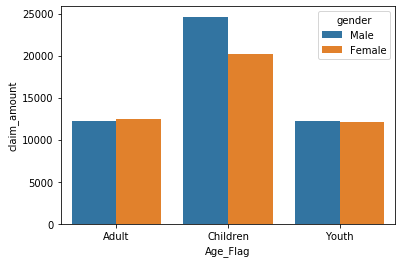

In [259]:
sns.barplot(NFC1.Age_Flag,NFC1.claim_amount,hue=NFC1.gender,hue_order=['Male','Female'])

###### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

In [ ]:
##16. Is there any similarity in the amount claimed by males and females?

##Step 1: H0=There is similarity between the amount claimed by males and females.(Null Hypothesis)
##Step 2: Ha=Both the groups are different.(Alternate Hypothesis)
##Step 3: We have taken a Confidence Interval of 95%(0.95)
##Step 4: Rejection Region is below 0.05.
##Step 5: We will be considering ANOVA test (We will analyse the variation on the amount claimed by 2 groups male and female)
##Step 6: As p value is high we will ACCEPT the null hypothesis(i.e claim amount by males and females are same)

In [13]:
from scipy import stats as stats

In [118]:
P1=Inp_Insurance.iloc[np.where(Inp_Insurance.gender=='Male')]

In [119]:
P2=Inp_Insurance.iloc[np.where(Inp_Insurance.gender=='Female')]

In [120]:
stats.f_oneway(P1.claim_amount,P2.claim_amount)

F_onewayResult(statistic=0.9483133979100016, pvalue=0.33036643165098045)

In [ ]:
##17. Is there any relationship between age category and segment?

##Step 1: H0=There is no relationship between Age category and segment i.e both are independent.(Null Hypothesis)
##Step 2: Ha=Both age category and segment are dependent.(Alternate Hypothesis)
##Step 3: We have taken a Confidence Interval of 95%(0.95)
##Step 4: Rejection Region is below 0.05.
##Step 5: We will be considering Chi sq test (We will analyse the association/disassociation between 2 categorical variables)
##Step 6: As p value is high(0.382) we will ACCEPT the null hypothesis
##(i.e There is no relationship between Age category and segment i.e both are independent.)

In [123]:
##Inp_Insurance.head()

In [125]:
stats.chi2_contingency(pd.crosstab(Inp_Insurance.Age_Flag,Inp_Insurance.Segment))

(1.9204852498679605,
 0.3827999978828701,
 2,
 array([[279.26267281, 269.58156682, 259.15576037],
        [ 95.73732719,  92.41843318,  88.84423963]]))

In [134]:
##stats.chi2(pd.crosstab(Inp_Insurance.Age_Flag,Inp_Insurance.Segment))

In [135]:
##stats.chisquare(pd.crosstab(Inp_Insurance.Age_Flag,Inp_Insurance.Segment))

In [ ]:
##18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

##Step 1: H0=The current year has not shown a significant rise in claim amounts as compared to 2016-17 fiscal average.(Null Hypothesis)
##Step 2: Ha=The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average.(Alternate Hypothesis)
##Step 3: We have taken a Confidence Interval of 95%(0.95)
##Step 4: Rejection Region is below 0.05.
##Step 5: We will be considering t test (We will compare the mean of the claim amount using 1 sample t test)
##Step 6: As p value is low we will REJECT the null hypothesis.
##(i.e The current year has not shown a significant rise in claim amounts as compared to 2016-17 fiscal average.)

In [139]:
stats.ttest_1samp(Inp_Insurance.claim_amount,popmean=10000)

Ttest_1sampResult(statistic=6.082468636028012, pvalue=1.6383633097209731e-09)

In [138]:
Inp_Insurance.claim_amount.mean()

## it is also evident from the mean of the sample.

12467.681372549034

In [ ]:
##19. Is there any difference between age groups and insurance claims?

##Step 1: H0=There is similarity between between age groups and insurance claims.(Null Hypothesis)
##Step 2: Ha=Both the groups are different.(Alternate Hypothesis)
##Step 3: We have taken a Confidence Interval of 95%(0.95)
##Step 4: Rejection Region is below 0.05.
##Step 5: We will be considering ANOVA test (We will analyse the variation on the amount claimed by 2 groups male and female)
##Step 6: As p value is low we will REJECT the null hypothesis(i.e age groups and insurance claims are different groups)

In [106]:
Inp_Insurance.Age_Flag.unique()

array(['Adult', 'Youth'], dtype=object)

In [122]:
Inp_Insurance.total_policy_claims.unique()

array([ 1.,  3.,  6.,  2.,  4., nan,  5.,  7.,  8.])

In [148]:
## We will create a dummy variable(Age_Group) for Age_Flag variable and convert categorical variable into continous variable
## Than apply f_oneway ANOVA test. 

In [109]:
Inp_Insurance['Age_Group']=np.where(Inp_Insurance.Age_Flag=='Youth',1,0)

In [149]:
## We will drop the null values from the data sets as it contribute approximately (~1%) of data. 

In [137]:
Inp_Insurance.fillna(Inp_Insurance.total_policy_claims.mode(),inplace=True)

In [141]:
Inp_Insurance=Inp_Insurance.dropna()

In [150]:
#Inp_Insurance.head(2)

In [146]:
stats.f_oneway(Inp_Insurance.Age_Group,Inp_Insurance.total_policy_claims)

F_onewayResult(statistic=1265.006818270711, pvalue=2.927927438731862e-218)

In [151]:
##20. Is there any relationship between total number of policy claims and the claimed amount?

##Step 1: H0=There is no relationship between total number of policy claims and the claimed amount.
##(i.e.)both are independent(Null Hypothesis)
##Step 2: Ha=Both the groups are corelated/dependent.(Alternate Hypothesis)
##Step 3: We have taken a Confidence Interval of 95%(0.95)
##Step 4: Rejection Region is below 0.05.
##Step 5: We will be considering Pearson Rank test (We will analyse the Pearson Cofficients for 2 continous variables.)
##Step 6: As corelation cofficient is (-0.017) which is weak.
##We will ACCEPT the null hypothesis(i.e total number of policy claims and the claimed amount are not related)

In [160]:
##Inp_Insurance.info()

In [158]:
Inp_Insurance.total_policy_claims=Inp_Insurance.total_policy_claims.fillna(Inp_Insurance.total_policy_claims.mean())

In [161]:
stats.pearsonr(Inp_Insurance.total_policy_claims,Inp_Insurance.claim_amount)

(-0.017448562393468967, 0.5658830110326771)